In [325]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, recall_score, f1_score
import re
from yellowbrick.classifier import confusion_matrix, ROCAUC
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
from lightgbm import LGBMClassifier

In [326]:
data = pd.read_csv('data/hospedagens.csv')

In [327]:
rain = pd.read_csv("data/chuvas.csv")

In [328]:
temp = pd.read_csv("data/temperatura.csv")

### Tratamento dos Dados

In [329]:
temp.head()

,Data,TempMed,TempMax,TempMin
0,24/07/2018,23.53,28.8,21.1
1,25/07/2018,23.04,28.0,20.6
2,26/07/2018,22.83,28.1,19.9
3,27/07/2018,22.77,27.7,19.6
4,28/07/2018,22.80,28.6,19.8


In [330]:
rain.head()

,Date,Rain_mm
0,10/1/2017,0.0
1,10/2/2017,0.0
2,10/3/2017,1.1
3,10/4/2017,0.0
4,10/5/2017,1.2


In [331]:
data.head()

,Reserva,Estado,Cliente,Email,Pax,Apartamento,Empresa,Agência,Referência,Data de entrada,...,Diárias,Horario de reabertura,Saldo devedor,Pago,Total,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,#17105-475.432,Fechado,Rosenildo Batista,prime_jet@hotmail.com,1,13,NaN,NaN,NaN,18/10/2017,...,5,NaN,R$ 0,0,R$ 1300,0,R$ 1300,0,NaN,NaN
1,#17106-356.342,Fechado,DIEGO MUNIZ,diego@cmotelecom.com.br,2,1,NaN,NaN,NaN,19/10/2017,...,2,NaN,R$ 0,0,R$ 530,0,R$ 530,0,NaN,NaN
2,#17106-935.772,Fechado,CARLOS HENRIQUE,carlos@comfibranet.com.br,2,6,NaN,NaN,NaN,19/10/2017,...,2,NaN,R$ 0,0,R$ 550,0,R$ 550,0,NaN,NaN
3,#17106-971.454,Fechado,JORGE LUIS R. FERREIRA,NaN,2,7,NaN,NaN,NaN,20/10/2017,...,4,NaN,R$ 0,0,R$ 1152,90,R$ 1152,90,NaN,NaN
4,#17106-866.159,Fechado,LORENA HUERGA,NaN,2,9,NaN,NaN,NaN,20/10/2017,...,4,NaN,R$ 0,0,R$ 1282,0,R$ 1282,0,NaN,NaN


In [332]:
data = data.drop(index = list(data[data["Data de entrada"].isnull()].index))

In [333]:
standrain = '%m/%d/%Y'

In [334]:
rain['Dia'] = rain['Date'].apply(lambda x : datetime.strptime(x,standrain))

In [335]:
rain.head()

,Date,Rain_mm,Dia
0,10/1/2017,0.0,2017-10-01
1,10/2/2017,0.0,2017-10-02
2,10/3/2017,1.1,2017-10-03
3,10/4/2017,0.0,2017-10-04
4,10/5/2017,1.2,2017-10-05


In [336]:
data.shape

(2906, 21)

In [337]:
standdata = '%d/%m/%Y'

In [338]:
data['Dia'] = data['Data de entrada'].apply(lambda x : datetime.strptime(str(x), standdata) )

In [339]:
data['Dia'].isnull().sum()

0

In [340]:
temp['Dia'] = temp['Data'].apply(lambda x : datetime.strptime(str(x), standdata) )

In [341]:
temp.head()

,Data,TempMed,TempMax,TempMin,Dia
0,24/07/2018,23.53,28.8,21.1,2018-07-24
1,25/07/2018,23.04,28.0,20.6,2018-07-25
2,26/07/2018,22.83,28.1,19.9,2018-07-26
3,27/07/2018,22.77,27.7,19.6,2018-07-27
4,28/07/2018,22.80,28.6,19.8,2018-07-28


In [342]:
#Trocando a ordem das colunas.
list(rain.columns)

['Date', 'Rain_mm', 'Dia']

In [343]:
#Trocando a ordem das colunas.

rain = rain[['Dia','Rain_mm', 'Date']]

In [344]:
d = {}
for i in range(len(rain)):
    d[rain['Dia'][i]] = rain['Rain_mm'][i]

In [345]:
d2 = {}
for i in range(len(temp)):
    d2[temp['Dia'][i]] = temp.loc[i, ['TempMin','TempMed','TempMax']]

In [346]:
temp.head()

,Data,TempMed,TempMax,TempMin,Dia
0,24/07/2018,23.53,28.8,21.1,2018-07-24
1,25/07/2018,23.04,28.0,20.6,2018-07-25
2,26/07/2018,22.83,28.1,19.9,2018-07-26
3,27/07/2018,22.77,27.7,19.6,2018-07-27
4,28/07/2018,22.80,28.6,19.8,2018-07-28


In [347]:
temp.head()

,Data,TempMed,TempMax,TempMin,Dia
0,24/07/2018,23.53,28.8,21.1,2018-07-24
1,25/07/2018,23.04,28.0,20.6,2018-07-25
2,26/07/2018,22.83,28.1,19.9,2018-07-26
3,27/07/2018,22.77,27.7,19.6,2018-07-27
4,28/07/2018,22.80,28.6,19.8,2018-07-28


In [348]:
data.head()

,Reserva,Estado,Cliente,Email,Pax,Apartamento,Empresa,Agência,Referência,Data de entrada,...,Horario de reabertura,Saldo devedor,Pago,Total,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Dia
0,#17105-475.432,Fechado,Rosenildo Batista,prime_jet@hotmail.com,1,13,NaN,NaN,NaN,18/10/2017,...,NaN,R$ 0,0,R$ 1300,0,R$ 1300,0,NaN,NaN,2017-10-18
1,#17106-356.342,Fechado,DIEGO MUNIZ,diego@cmotelecom.com.br,2,1,NaN,NaN,NaN,19/10/2017,...,NaN,R$ 0,0,R$ 530,0,R$ 530,0,NaN,NaN,2017-10-19
2,#17106-935.772,Fechado,CARLOS HENRIQUE,carlos@comfibranet.com.br,2,6,NaN,NaN,NaN,19/10/2017,...,NaN,R$ 0,0,R$ 550,0,R$ 550,0,NaN,NaN,2017-10-19
3,#17106-971.454,Fechado,JORGE LUIS R. FERREIRA,NaN,2,7,NaN,NaN,NaN,20/10/2017,...,NaN,R$ 0,0,R$ 1152,90,R$ 1152,90,NaN,NaN,2017-10-20
4,#17106-866.159,Fechado,LORENA HUERGA,NaN,2,9,NaN,NaN,NaN,20/10/2017,...,NaN,R$ 0,0,R$ 1282,0,R$ 1282,0,NaN,NaN,2017-10-20


In [349]:
d

{Timestamp('2017-10-01 00:00:00'): 0.0,
 Timestamp('2017-10-02 00:00:00'): 0.0,
 Timestamp('2017-10-03 00:00:00'): 1.1,
 Timestamp('2017-10-04 00:00:00'): 0.0,
 Timestamp('2017-10-05 00:00:00'): 1.2,
 Timestamp('2017-10-06 00:00:00'): 0.7,
 Timestamp('2017-10-07 00:00:00'): 0.0,
 Timestamp('2017-10-08 00:00:00'): 0.1,
 Timestamp('2017-10-09 00:00:00'): 0.0,
 Timestamp('2017-10-10 00:00:00'): 0.0,
 Timestamp('2017-10-11 00:00:00'): 0.0,
 Timestamp('2017-10-12 00:00:00'): 0.1,
 Timestamp('2017-10-13 00:00:00'): 0.0,
 Timestamp('2017-10-14 00:00:00'): 1.2,
 Timestamp('2017-10-15 00:00:00'): 0.8,
 Timestamp('2017-10-16 00:00:00'): 0.2,
 Timestamp('2017-10-17 00:00:00'): 1.8,
 Timestamp('2017-10-18 00:00:00'): 55.6,
 Timestamp('2017-10-19 00:00:00'): 7.2,
 Timestamp('2017-10-20 00:00:00'): 0.0,
 Timestamp('2017-10-21 00:00:00'): 0.0,
 Timestamp('2017-10-22 00:00:00'): 0.0,
 Timestamp('2017-10-23 00:00:00'): 0.0,
 Timestamp('2017-10-24 00:00:00'): 0.9,
 Timestamp('2017-10-25 00:00:00'): 1.6,

In [350]:
data = data.merge(rain,on='Dia',how='outer').merge(temp,on='Dia',how='outer')

In [351]:
data.head()

,Reserva,Estado,Cliente,Email,Pax,Apartamento,Empresa,Agência,Referência,Data de entrada,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Dia,Rain_mm,Date,Data,TempMed,TempMax,TempMin
0,#17105-475.432,Fechado,Rosenildo Batista,prime_jet@hotmail.com,1,13,NaN,NaN,NaN,18/10/2017,...,0,NaN,NaN,2017-10-18,55.6,10/18/2017,NaN,NaN,NaN,NaN
1,#17106-356.342,Fechado,DIEGO MUNIZ,diego@cmotelecom.com.br,2,1,NaN,NaN,NaN,19/10/2017,...,0,NaN,NaN,2017-10-19,7.2,10/19/2017,NaN,NaN,NaN,NaN
2,#17106-935.772,Fechado,CARLOS HENRIQUE,carlos@comfibranet.com.br,2,6,NaN,NaN,NaN,19/10/2017,...,0,NaN,NaN,2017-10-19,7.2,10/19/2017,NaN,NaN,NaN,NaN
3,#17106-971.454,Fechado,JORGE LUIS R. FERREIRA,NaN,2,7,NaN,NaN,NaN,20/10/2017,...,90,NaN,NaN,2017-10-20,0.0,10/20/2017,NaN,NaN,NaN,NaN
4,#17106-866.159,Fechado,LORENA HUERGA,NaN,2,9,NaN,NaN,NaN,20/10/2017,...,0,NaN,NaN,2017-10-20,0.0,10/20/2017,NaN,NaN,NaN,NaN


In [352]:
data.shape

(3034, 28)

In [353]:
data = data.query('Estado in ("Fechado","Cancelado")')

In [354]:
data.Estado.value_counts()

Fechado      2389
Cancelado     511
Name: Estado, dtype: int64

In [355]:
def empresa(x):
    if x == 'Booking.com':
        return 1
    else:
        return 0 

In [356]:
data['Booking'] = data['Empresa'].apply(lambda x : empresa(x))

In [357]:
data = data.reset_index()

In [358]:
data.columns

Index(['index', 'Reserva', 'Estado', 'Cliente', 'Email', 'Pax', 'Apartamento',
       'Empresa', 'Agência', 'Referência', 'Data de entrada', 'Data de saída',
       'Diárias', 'Horario de reabertura', 'Saldo devedor', 'Pago', 'Total',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Dia', 'Rain_mm', 'Date', 'Data', 'TempMed', 'TempMax',
       'TempMin', 'Booking'],
      dtype='object')

In [359]:
def transform(x):
    try:
        if type(x) == str:
            return int(x)
        else:
            return np.nan
    except:
        return np.nan

In [360]:
def transformEstado(x):

    if x == 'Fechado':
        return 0
    elif x == 'Cancelado':
        return 1


In [361]:
def transformTotal(x):
    try:
        if type(x) == str:
            return int(re.findall(r'\d+',x)[0])
        else:
            return np.nan
    except:
        return np.nan

In [362]:
data['Ocupa'] = data['Pax'].apply(lambda x : transform(x))

In [363]:
data['Diarias'] = data['Diárias'].apply(lambda x : transform(x))

In [364]:
data['Custo'] = data['Unnamed: 17'].apply(lambda x : transformTotal(x))

In [365]:
data['Status'] = data['Estado'].apply(lambda x : transformEstado(x))

In [366]:
data['Quarto'] = data['Apartamento'].apply(lambda x : transform(x))

In [367]:
data = data.query('Cliente != "Julio e Angela"')

In [368]:
data.columns

Index(['index', 'Reserva', 'Estado', 'Cliente', 'Email', 'Pax', 'Apartamento',
       'Empresa', 'Agência', 'Referência', 'Data de entrada', 'Data de saída',
       'Diárias', 'Horario de reabertura', 'Saldo devedor', 'Pago', 'Total',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Dia', 'Rain_mm', 'Date', 'Data', 'TempMed', 'TempMax',
       'TempMin', 'Booking', 'Ocupa', 'Diarias', 'Custo', 'Status', 'Quarto'],
      dtype='object')

In [369]:
toDrop = ['Pax','Apartamento','Data','Date','Empresa','Unnamed: 16', 'Unnamed: 17', 
          'Unnamed: 18','index', 'Agência', 'Diárias', 'Referência', 'Total', 
          'Unnamed: 19', 'Unnamed: 20','Saldo devedor']

In [370]:
data = data.drop(columns = toDrop)

In [371]:
data.columns

Index(['Reserva', 'Estado', 'Cliente', 'Email', 'Data de entrada',
       'Data de saída', 'Horario de reabertura', 'Pago', 'Dia', 'Rain_mm',
       'TempMed', 'TempMax', 'TempMin', 'Booking', 'Ocupa', 'Diarias', 'Custo',
       'Status', 'Quarto'],
      dtype='object')

In [372]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2863 entries, 0 to 2899
Data columns (total 19 columns):
Reserva                  2863 non-null object
Estado                   2863 non-null object
Cliente                  2863 non-null object
Email                    490 non-null object
Data de entrada          2863 non-null object
Data de saída            2863 non-null object
Horario de reabertura    47 non-null object
Pago                     2863 non-null object
Dia                      2863 non-null datetime64[ns]
Rain_mm                  2848 non-null float64
TempMed                  1830 non-null float64
TempMax                  1830 non-null float64
TempMin                  1830 non-null float64
Booking                  2863 non-null int64
Ocupa                    2863 non-null int64
Diarias                  2863 non-null int64
Custo                    2863 non-null int64
Status                   2863 non-null int64
Quarto                   2797 non-null float64
dtypes: dateti

In [373]:
data.head()

,Reserva,Estado,Cliente,Email,Data de entrada,Data de saída,Horario de reabertura,Pago,Dia,Rain_mm,TempMed,TempMax,TempMin,Booking,Ocupa,Diarias,Custo,Status,Quarto
0,#17105-475.432,Fechado,Rosenildo Batista,prime_jet@hotmail.com,18/10/2017,23/10/2017,NaN,0,2017-10-18,55.6,NaN,NaN,NaN,0,1,5,1300,0,13.0
1,#17106-356.342,Fechado,DIEGO MUNIZ,diego@cmotelecom.com.br,19/10/2017,21/10/2017,NaN,0,2017-10-19,7.2,NaN,NaN,NaN,0,2,2,530,0,1.0
2,#17106-935.772,Fechado,CARLOS HENRIQUE,carlos@comfibranet.com.br,19/10/2017,21/10/2017,NaN,0,2017-10-19,7.2,NaN,NaN,NaN,0,2,2,550,0,6.0
3,#17106-971.454,Fechado,JORGE LUIS R. FERREIRA,NaN,20/10/2017,24/10/2017,NaN,0,2017-10-20,0.0,NaN,NaN,NaN,0,2,4,1152,0,7.0
4,#17106-866.159,Fechado,LORENA HUERGA,NaN,20/10/2017,24/10/2017,NaN,0,2017-10-20,0.0,NaN,NaN,NaN,0,2,4,1282,0,9.0


In [374]:
data.dtypes

Reserva                          object
Estado                           object
Cliente                          object
Email                            object
Data de entrada                  object
Data de saída                    object
Horario de reabertura            object
Pago                             object
Dia                      datetime64[ns]
Rain_mm                         float64
TempMed                         float64
TempMax                         float64
TempMin                         float64
Booking                           int64
Ocupa                             int64
Diarias                           int64
Custo                             int64
Status                            int64
Quarto                          float64
dtype: object

In [375]:
data[data.TempMed.isna()].shape

(1033, 19)

In [398]:
toML = ['TempMed','TempMax','TempMin','Rain_mm','Custo','Diarias','Booking']

X = data[toML]
y = data['Status']

In [399]:
X.dtypes

TempMed    float64
TempMax    float64
TempMin    float64
Rain_mm    float64
Custo        int64
Diarias      int64
Booking      int64
dtype: object

In [400]:
X = X.fillna(X.mean())

In [401]:
X.head()

,TempMed,TempMax,TempMin,Rain_mm,Custo,Diarias,Booking
0,25.753066,31.160055,22.522131,55.6,1300,5,0
1,25.753066,31.160055,22.522131,7.2,530,2,0
2,25.753066,31.160055,22.522131,7.2,550,2,0
3,25.753066,31.160055,22.522131,0.0,1152,4,0
4,25.753066,31.160055,22.522131,0.0,1282,4,0


In [402]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [403]:
X_train.head()

,TempMed,TempMax,TempMin,Rain_mm,Custo,Diarias,Booking
2727,26.70,32.8,23.3,0.0,640,2,1
2478,25.03,29.6,20.8,2.1,272,1,0
2558,24.27,30.1,21.5,2.0,386,2,0
2470,22.99,25.8,20.5,10.5,2284,7,1
1958,27.30,32.0,24.4,0.0,578,2,1


In [404]:
# lst = [1,25,50,75,100,150,200,250,300,500,700, 900, 1200, 1500]
lst = [1,25,50,75,100,150,200,250,300]
# dep = [1,2,4,8,12,16,20,30,40,50]
dep = [1,2,4,8,12]
axis = []
lgb = []
rf = []
for i in lst:
    for j in dep:
        
        model1 = LGBMClassifier(n_estimators=i, max_depth=j)
        model2 = RandomForestClassifier(n_estimators=i, max_depth=j)

        model1.fit(X_train, y_train)
        model2.fit(X_train, y_train)


        pred1 = model1.predict(X_test)
        pred2 = model2.predict(X_test)

        r1 = recall_score(y_test, pred1)
        F1_1 = f1_score(y_test, pred1)
        r2 = recall_score(y_test, pred2)
        F1_2 = f1_score(y_test, pred1)
        
        axis.append( f'{i}-{j}' )
        
        lgb.append(F1_1)
        rf.append(F1_2)
        
        
        print(f'({i}-{j}) --> LGB: {r1:0.2f}/{F1_1:0.2f} Forest: {r2:0.2f}/{F1_2:0.2f} ')
    print('----')

(1-1) --> LGB: 0.00/0.00 Forest: 0.00/0.00 
(1-2) --> LGB: 0.00/0.00 Forest: 0.00/0.00 
(1-4) --> LGB: 0.00/0.00 Forest: 0.06/0.00 
(1-8) --> LGB: 0.00/0.00 Forest: 0.08/0.00 
(1-12) --> LGB: 0.00/0.00 Forest: 0.24/0.00 
----
(25-1) --> LGB: 0.00/0.00 Forest: 0.00/0.00 
(25-2) --> LGB: 0.02/0.04 Forest: 0.00/0.04 
(25-4) --> LGB: 0.03/0.06 Forest: 0.01/0.06 
(25-8) --> LGB: 0.06/0.11 Forest: 0.09/0.11 
(25-12) --> LGB: 0.06/0.11 Forest: 0.14/0.11 
----
(50-1) --> LGB: 0.00/0.00 Forest: 0.00/0.00 
(50-2) --> LGB: 0.03/0.06 Forest: 0.00/0.06 
(50-4) --> LGB: 0.07/0.13 Forest: 0.04/0.13 
(50-8) --> LGB: 0.12/0.20 Forest: 0.05/0.20 
(50-12) --> LGB: 0.12/0.19 Forest: 0.12/0.19 
----
(75-1) --> LGB: 0.01/0.02 Forest: 0.00/0.02 
(75-2) --> LGB: 0.07/0.13 Forest: 0.00/0.13 
(75-4) --> LGB: 0.11/0.19 Forest: 0.03/0.19 
(75-8) --> LGB: 0.18/0.26 Forest: 0.09/0.26 
(75-12) --> LGB: 0.16/0.22 Forest: 0.12/0.22 
----
(100-1) --> LGB: 0.03/0.06 Forest: 0.00/0.06 
(100-2) --> LGB: 0.07/0.13 Forest: 

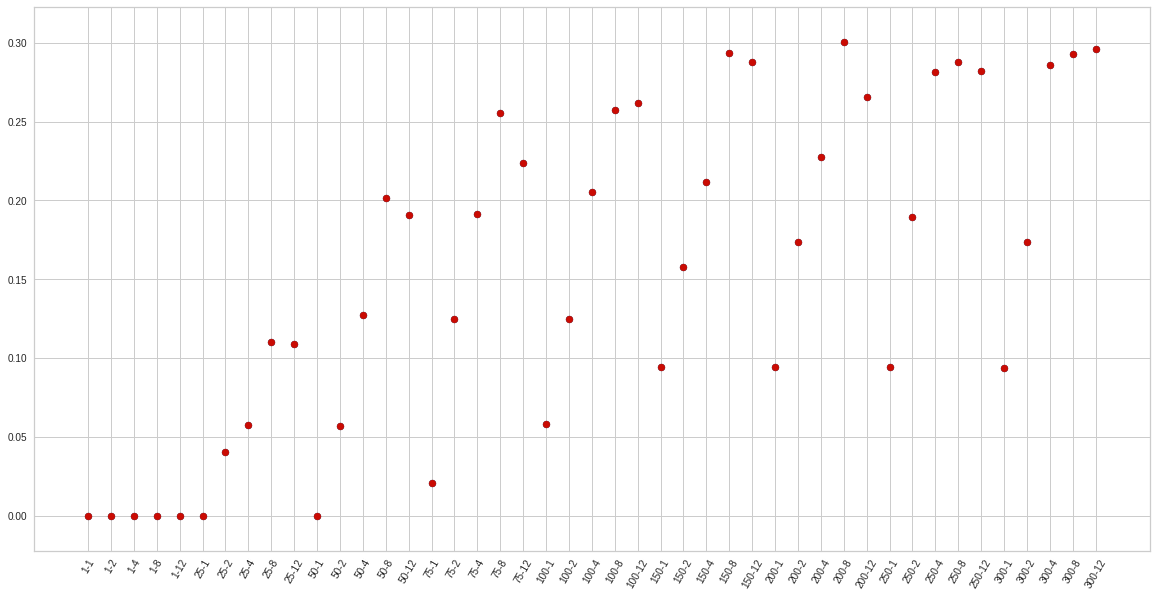

In [405]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 60)
plt.scatter(x = axis, y = rf, color = 'b')
plt.scatter(x = axis, y = lgb, color = 'r');

In [406]:
#Pegando o melhor modelo com 1200 e 50.
model = RandomForestClassifier(n_estimators=250, max_depth=8)

model.fit(X_train, y_train)

pred = model.predict(X_test)



In [408]:
print(classification_report(y_test, pred))
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       477
           1       0.55      0.06      0.11        96

    accuracy                           0.83       573
   macro avg       0.69      0.53      0.51       573
weighted avg       0.79      0.83      0.78       573

              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1884
           1       0.96      0.27      0.42       406

    accuracy                           0.87      2290
   macro avg       0.91      0.63      0.67      2290
weighted avg       0.88      0.87      0.84      2290



In [409]:
from sklearn.preprocessing import binarize

In [410]:
y_test2 = binarize(model1.predict_proba(X_test), threshold=0.2)[:, 1]

print(classification_report(y_test, y_test2))


              precision    recall  f1-score   support

           0       0.89      0.79      0.83       477
           1       0.32      0.51      0.40        96

    accuracy                           0.74       573
   macro avg       0.61      0.65      0.62       573
weighted avg       0.79      0.74      0.76       573



/home/nacholez/anaconda3/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


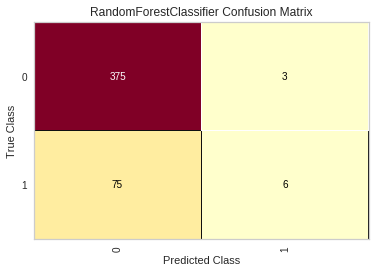

In [411]:
visualizer = confusion_matrix(model, X_test, y_test, test_size = 0.80)

In [412]:
# Reserva normal
print((y_test == 0).sum())
print((pred == 0).sum())

477
562


In [413]:
# Reserva Cancelada
print((y_test == 1).sum())
print((pred == 1).sum())

96
11


In [414]:
model1.feature_importances_

array([1152, 1051,  875, 1356, 3127,  542,  207], dtype=int32)

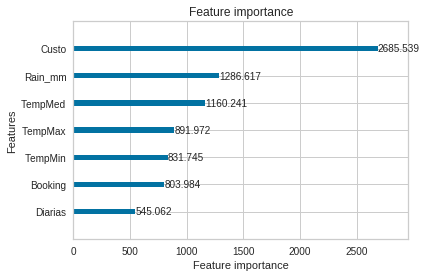

In [415]:
import lightgbm as lgb

lgb.plot_importance(model1, importance_type='gain');

In [416]:
data.head()

,Reserva,Estado,Cliente,Email,Data de entrada,Data de saída,Horario de reabertura,Pago,Dia,Rain_mm,TempMed,TempMax,TempMin,Booking,Ocupa,Diarias,Custo,Status,Quarto
0,#17105-475.432,Fechado,Rosenildo Batista,prime_jet@hotmail.com,18/10/2017,23/10/2017,NaN,0,2017-10-18,55.6,NaN,NaN,NaN,0,1,5,1300,0,13.0
1,#17106-356.342,Fechado,DIEGO MUNIZ,diego@cmotelecom.com.br,19/10/2017,21/10/2017,NaN,0,2017-10-19,7.2,NaN,NaN,NaN,0,2,2,530,0,1.0
2,#17106-935.772,Fechado,CARLOS HENRIQUE,carlos@comfibranet.com.br,19/10/2017,21/10/2017,NaN,0,2017-10-19,7.2,NaN,NaN,NaN,0,2,2,550,0,6.0
3,#17106-971.454,Fechado,JORGE LUIS R. FERREIRA,NaN,20/10/2017,24/10/2017,NaN,0,2017-10-20,0.0,NaN,NaN,NaN,0,2,4,1152,0,7.0
4,#17106-866.159,Fechado,LORENA HUERGA,NaN,20/10/2017,24/10/2017,NaN,0,2017-10-20,0.0,NaN,NaN,NaN,0,2,4,1282,0,9.0


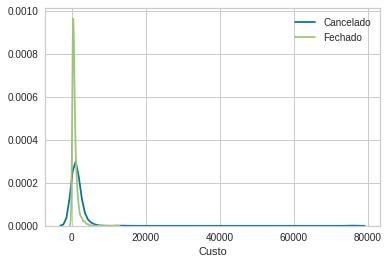

In [417]:
sns.distplot(data.query('Status == 1')['Custo'], hist=False, label='Cancelado')
sns.distplot(data.query('Status == 0')['Custo'], hist=False, label='Fechado');

In [418]:
data.corr()

,Rain_mm,TempMed,TempMax,TempMin,Booking,Ocupa,Diarias,Custo,Status,Quarto
Rain_mm,1.000000,0.015377,0.023137,0.047843,-0.027063,-0.025310,0.087502,0.003884,0.029839,-0.023571
TempMed,0.015377,1.000000,0.928443,0.893834,0.019751,0.044538,0.113808,0.171923,0.044866,-0.039442
TempMax,0.023137,0.928443,1.000000,0.724751,0.015695,0.051668,0.108427,0.177173,0.037495,-0.039029
TempMin,0.047843,0.893834,0.724751,1.000000,0.021749,0.023235,0.112403,0.126864,0.037848,-0.038979
Booking,-0.027063,0.019751,0.015695,0.021749,1.000000,0.144965,0.052451,0.116434,0.266000,-0.179674
Ocupa,-0.025310,0.044538,0.051668,0.023235,0.144965,1.000000,-0.012804,0.120218,0.062589,-0.486075
Diarias,0.087502,0.113808,0.108427,0.112403,0.052451,-0.012804,1.000000,0.430747,0.155155,-0.002624
Custo,0.003884,0.171923,0.177173,0.126864,0.116434,0.120218,0.430747,1.000000,0.140877,-0.110543
Status,0.029839,0.044866,0.037495,0.037848,0.266000,0.062589,0.155155,0.140877,1.000000,-0.035321
Quarto,-0.023571,-0.039442,-0.039029,-0.038979,-0.179674,-0.486075,-0.002624,-0.110543,-0.035321,1.000000


/home/nacholez/anaconda3/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


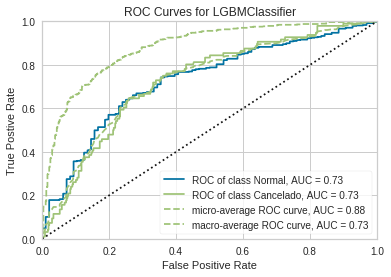

In [419]:
visualizer = ROCAUC(model1, classes=["Normal", "Cancelado"])

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)       
visualizer.show()   

In [420]:
from yellowbrick.model_selection import LearningCurve

/home/nacholez/anaconda3/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


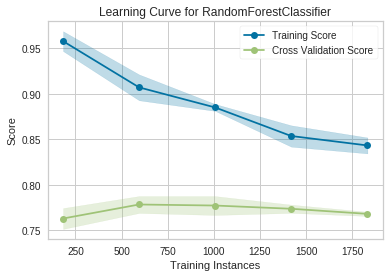

In [421]:
visualizer = LearningCurve(model, scoring='f1_weighted', n_jobs=4)

visualizer.fit(X_train, y_train)       
visualizer.show();